# Análise da Desigualdade e Mortes Violentas no Brasil (2012–2022)

Este projeto analisa a relação entre o índice de desigualdade (medido pelo Índice de Gini) e os índices de violência nos estados brasileiros ao longo dos anos. O objetivo é identificar padrões, tendências e possíveis correlações entre os dois fenômenos.

In [ ]:
import sys
import os
sys.path.append(os.path.abspath('..')) 

from src.Data_handler import Data_handler
from src.PlotGenerator import PlotGenerator
from src.utils.Utils import Utils

mortes_violentas_csv_path = os.path.join('../datas', 'mortes-violentas.csv' )
indice_gini_csv_path = os.path.join('../datas', 'ipeadata[05-06-2025-04-16].csv' )

dh_mv = Data_handler(mortes_violentas_csv_path)
dh_gini = Data_handler(indice_gini_csv_path)

df_mv = dh_mv.load_csv()
df_gini = dh_gini.load_csv(skiprows=1)

df_mv = dh_mv.clean_data()
df_gini = dh_gini.clean_data()

for i in range(2012, 2023):
    df_gini[str(i)] = df_gini[str(i)].str.replace(',', '.').astype(float)

df_gini_long = dh_gini.gini_df_to_long(df=df_gini)
df_gini_long = df_gini_long.rename(columns={'Sigla': 'UF', 'Ano': 'ano'})

df_mv_filtrado = df_mv[(df_mv['periodo'] >= 2012) & (df_mv['periodo'] <= 2022)]
df_mv_filtrado = df_mv_filtrado.rename(columns={'nome': 'UF', 'periodo': 'ano'})

utils_df_mv = Utils(df=df_mv_filtrado)
utils_df_mv.column_type_converter(column_name='ano', type=int)
utils_df_mv.column_type_converter(column_name='valor', type=int)

utils_df_gini = Utils(df=df_gini_long)
utils_df_gini.column_type_converter(column_name='ano', type=int)

## Análise do Índice de Gini por Estado

Vamos visualizar a evolução do índice de Gini, que mede a desigualdade de renda, para cada estado ao longo dos anos.

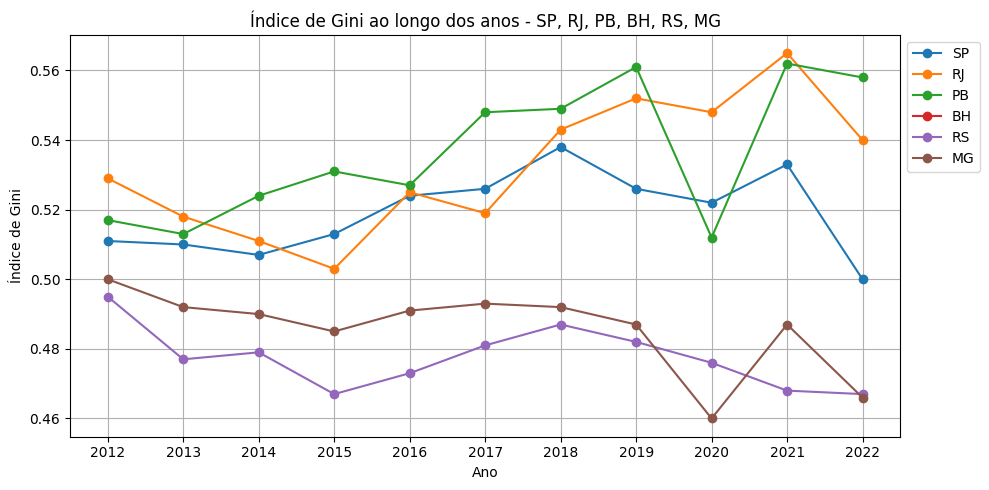

In [2]:
plt_gini = PlotGenerator(df_gini_long)
plt_gini.plot_gini_over_time_by_state(['SP', 'RJ', 'PB', 'BH', 'RS', 'MG'])

## Análise de Mortes violentas por Estado 

Visualizamos o valor de mortes violentas por estado ao longo dos anos (2012 - 2022)


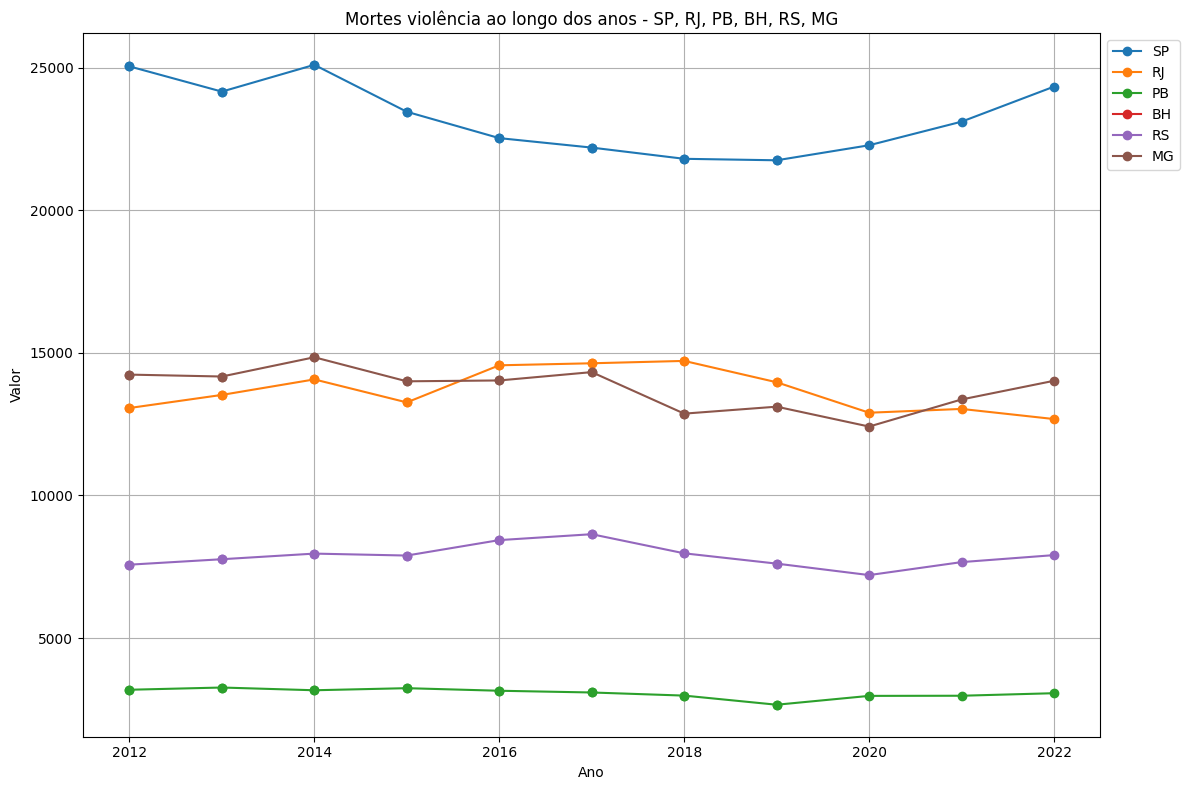

In [3]:
plt_mv = PlotGenerator(df=df_mv_filtrado)
plt_mv.plot_violence_over_time_by_state(['SP', 'RJ', 'PB', 'BH', 'RS', 'MG'])

## Relação entre Desigualdade e Violência por Estado

Agora comparamos visualmente a evolução dos dois indicadores para entender se há relação direta entre eles.
